# BOOK RECOMMENDATION SYSTEM


Have you ever wondered for a system which suggest a new set of books for your previously read books !?.

Recommendation Systems are there to help, they are very common to us due to continuous demand and need to get the best book to read.


## Problem Statements

1)In this Project we analyse and preprocess the Book Crossing Dataset.

2)We apply Machine Learning to recommend different books from a book you previously read.

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [91]:
books=pd.read_csv(r"Books.csv")

C:\Users\Kaushik Krishna\AppData\Local\Temp\ipykernel_5260\790413385.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books=pd.read_csv(r"Books.csv")


In [92]:
users=pd.read_csv(r"Users.csv")

In [93]:
ratings=pd.read_csv(r"Ratings.csv")

### Insight of Dataset

In [94]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [95]:
books.shape

(271360, 8)

## DISPLAYING THE DATA

In [96]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [97]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [98]:
bookcols=['ISBN', 'BookTitle', 'BookAuthor', 'YearOfPublication', 'Publisher',
       'ImageURLS', 'ImageURLM', 'ImageURLL']

In [99]:
books.columns=bookcols

In [100]:
books.columns

Index(['ISBN', 'BookTitle', 'BookAuthor', 'YearOfPublication', 'Publisher',
       'ImageURLS', 'ImageURLM', 'ImageURLL'],
      dtype='object')

In [101]:
books.head()

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher,ImageURLS,ImageURLM,ImageURLL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


### Data Cleaning (Books)

In [102]:
books.isnull().sum()

ISBN                 0
BookTitle            0
BookAuthor           1
YearOfPublication    0
Publisher            2
ImageURLS            0
ImageURLM            0
ImageURLL            3
dtype: int64

In [103]:
books.loc[books.BookAuthor.isnull(),:] #searching null values

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher,ImageURLS,ImageURLM,ImageURLL
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


In [104]:
books.YearOfPublication.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

#### 2 records have value of publisher in year of publication which needs to be corrected

In [105]:
books.drop(books[books.YearOfPublication == 'DK Publishing Inc'].index,inplace=True)

In [106]:
books.drop(books[books.YearOfPublication == 'Gallimard'].index,inplace=True)

In [107]:
pd.to_numeric(books['YearOfPublication'])

0         2002
1         2001
2         1991
3         1999
4         1999
          ... 
271355    1988
271356    1991
271357    2004
271358    1996
271359    2000
Name: YearOfPublication, Length: 271357, dtype: int64

#### The records with incorrect data have been dropped

In [108]:
books.shape

(271357, 8)

In [109]:
books.isnull().sum()

ISBN                 0
BookTitle            0
BookAuthor           1
YearOfPublication    0
Publisher            2
ImageURLS            0
ImageURLM            0
ImageURLL            0
dtype: int64

In [110]:
#removes the na values
books['BookAuthor'].dropna(inplace=True)

In [111]:
books['Publisher'].dropna(inplace=True)

#### Since there were negligible null values present, the records can be dropped

In [112]:
books.duplicated().sum()

0

### Data Cleaning(Users)

In [113]:
users.shape

(278858, 3)

In [114]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [115]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [116]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

#### Since age of user is not of any importance in recommendation, the entire column can be dropped

In [117]:
users.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

In [118]:
users.drop(['Age'],axis=1,inplace=True)

In [119]:
users.duplicated().sum()

0

### Data Cleaning(Rating)

In [120]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [121]:
ratings.shape

(1149780, 3)

In [122]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [123]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [124]:
ratings.duplicated().sum()

0

In [125]:
ratings.groupby("ISBN").count()

,User-ID,Book-Rating
ISBN,,
0330299891,2,2
0375404120,2,2
0586045007,1,1
9022906116,2,2
9032803328,1,1
...,...,...
cn113107,1,1
ooo7156103,1,1
§423350229,1,1


### Visualising Rating Counts

The below plot shows the explicit rating counts that was formed using seaborn library

We can observe that the dataset has many number of 0 rating books


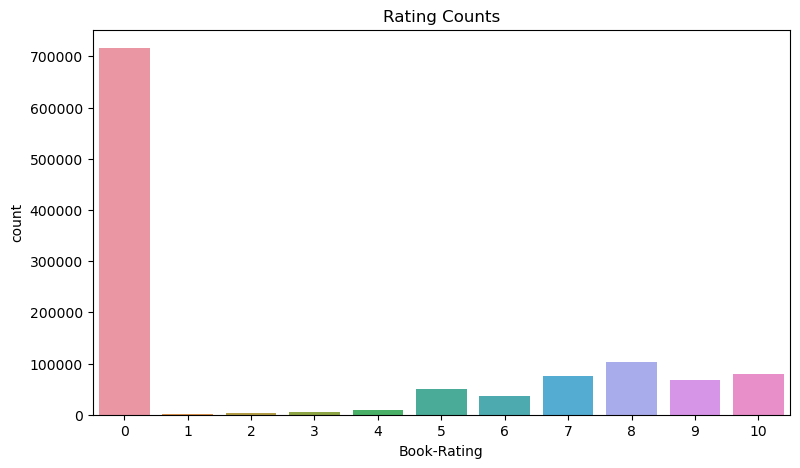

In [126]:
plt.figure(figsize=(9, 5))
plt.title('Rating Counts')
sns.countplot(data = ratings,x = 'Book-Rating');

### Cleaning Title text

In [127]:
def clean_text(text):
    #removal of url
    # re.sub() is used to substitute all matches of the pattern in 'text' with a space ' '
    text = re.sub(r'https?://\S+|www\.\S+|http?://\S+',' ',text) 
    
    #removal of html tags
    text = re.sub(r'<.*?>',' ',text) 
    
    text = re.sub("["
                           u"\U0001F600-\U0001F64F"  # removal of emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+",' ',text)
    
    
    #remove newline char
    text = re.sub('\n', '', text)
    
    return text

In [128]:
books.BookTitle = books.BookTitle.apply(lambda x:clean_text(x))

### Merging Books and rating datasets

In [129]:
merged_data = pd.merge(books, ratings, on='ISBN')

In [130]:
merged_data.shape

(1031132, 10)

In [131]:
merged_data.isnull().sum()

ISBN                 0
BookTitle            0
BookAuthor           1
YearOfPublication    0
Publisher            2
ImageURLS            0
ImageURLM            0
ImageURLL            0
User-ID              0
Book-Rating          0
dtype: int64

### Visualising top 30 most read books
 Using Series.value_counts() and sns.barplotfor creating data and visualisation respectively
 
 We can obesrve that Wild Animus has the most read books by a huge margin followed by The Lovely Bones

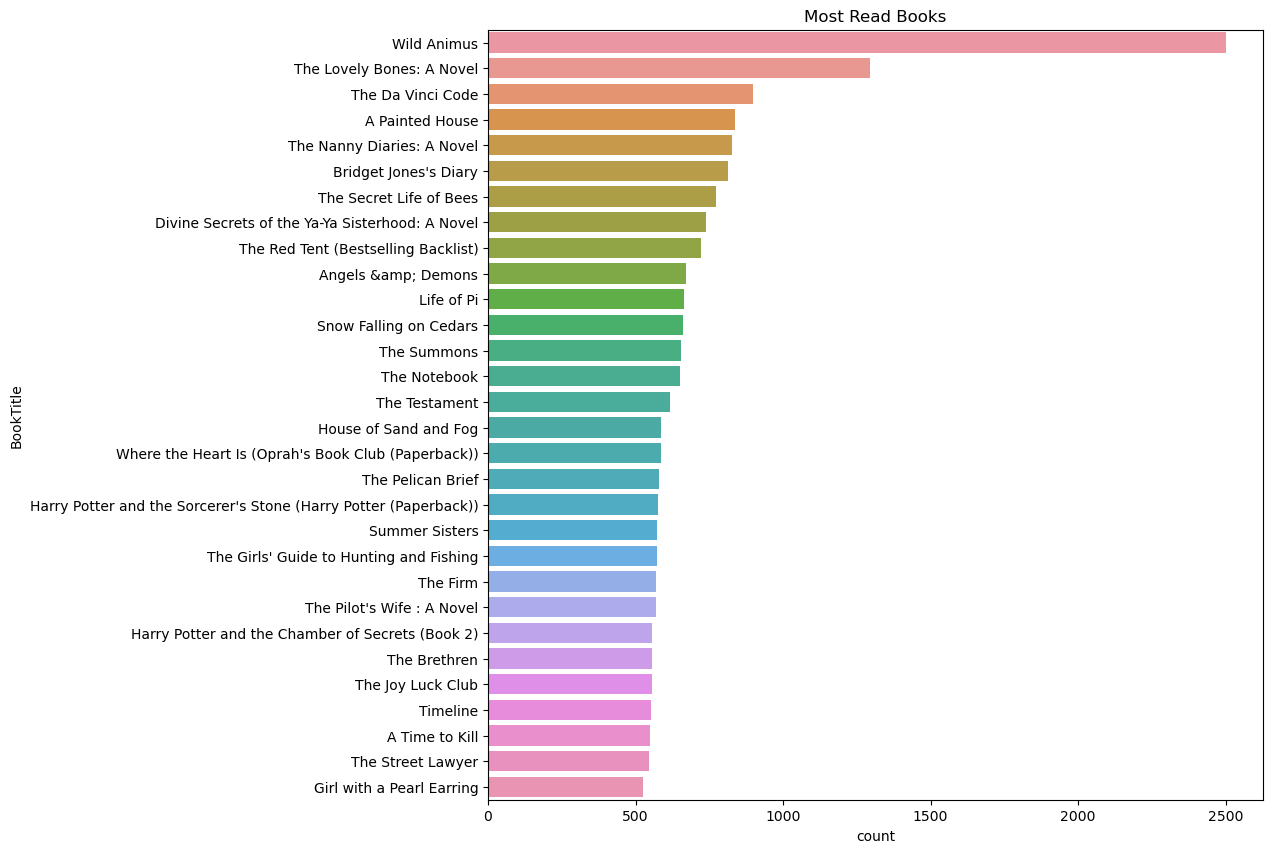

In [132]:
# Count the number of occurrences of each unique book title and reset the index
most_read = merged_data['BookTitle'].value_counts().reset_index()
most_read.columns = ['BookTitle','count']
# Create a new figure for the bar chart with a size of 10x10 inches
plt.figure(figsize = (10,10))
plt.title("Most Read Books")
sns.barplot(x = 'count', y = 'BookTitle', data = most_read.head(30));

### Top rated books

In [133]:
# Select the 'BookTitle' and 'Book-Rating' columns from the 'merged_data' DataFrame
top_rated = merged_data[['BookTitle','Book-Rating']]
top_rated = top_rated.groupby('BookTitle',as_index=False)['Book-Rating'].mean()
# Sort the data by 'Book-Rating' in descending order to find the top-rated books
top_rated = top_rated.sort_values('Book-Rating',ascending=False).reset_index()
# Keep only the 'BookTitle' and 'Book-Rating' columns in the final result
top_rated = top_rated[['BookTitle','Book-Rating']]
top_rated.head()

,BookTitle,Book-Rating
0,Queen Victoria,10.0
1,Bad Blood Tuskegee Syphilis Experiment,10.0
2,Eli's Wings,10.0
3,Elinor Fettiplace's Receipt Book: Elizabethan ...,10.0
4,To the Elephant Graveyard,10.0


### Visualising top 30 most read books with there average ratings

In [134]:
# Calculate the average rating for each book by grouping 'merged_data' by 'BookTitle'
avg_data = merged_data.groupby('BookTitle', as_index=False)['Book-Rating'].mean()
# Count the number of reads for each book by counting occurrences of 'BookTitle' in 'merged_data'
temp = merged_data.BookTitle.value_counts().reset_index()
temp.columns = ['BookTitle','count']
# Merge the two DataFrames ('avg_data' and 'temp') based on the 'BookTitle' column
most_rated_by_reads = pd.merge(avg_data,temp,on='BookTitle')

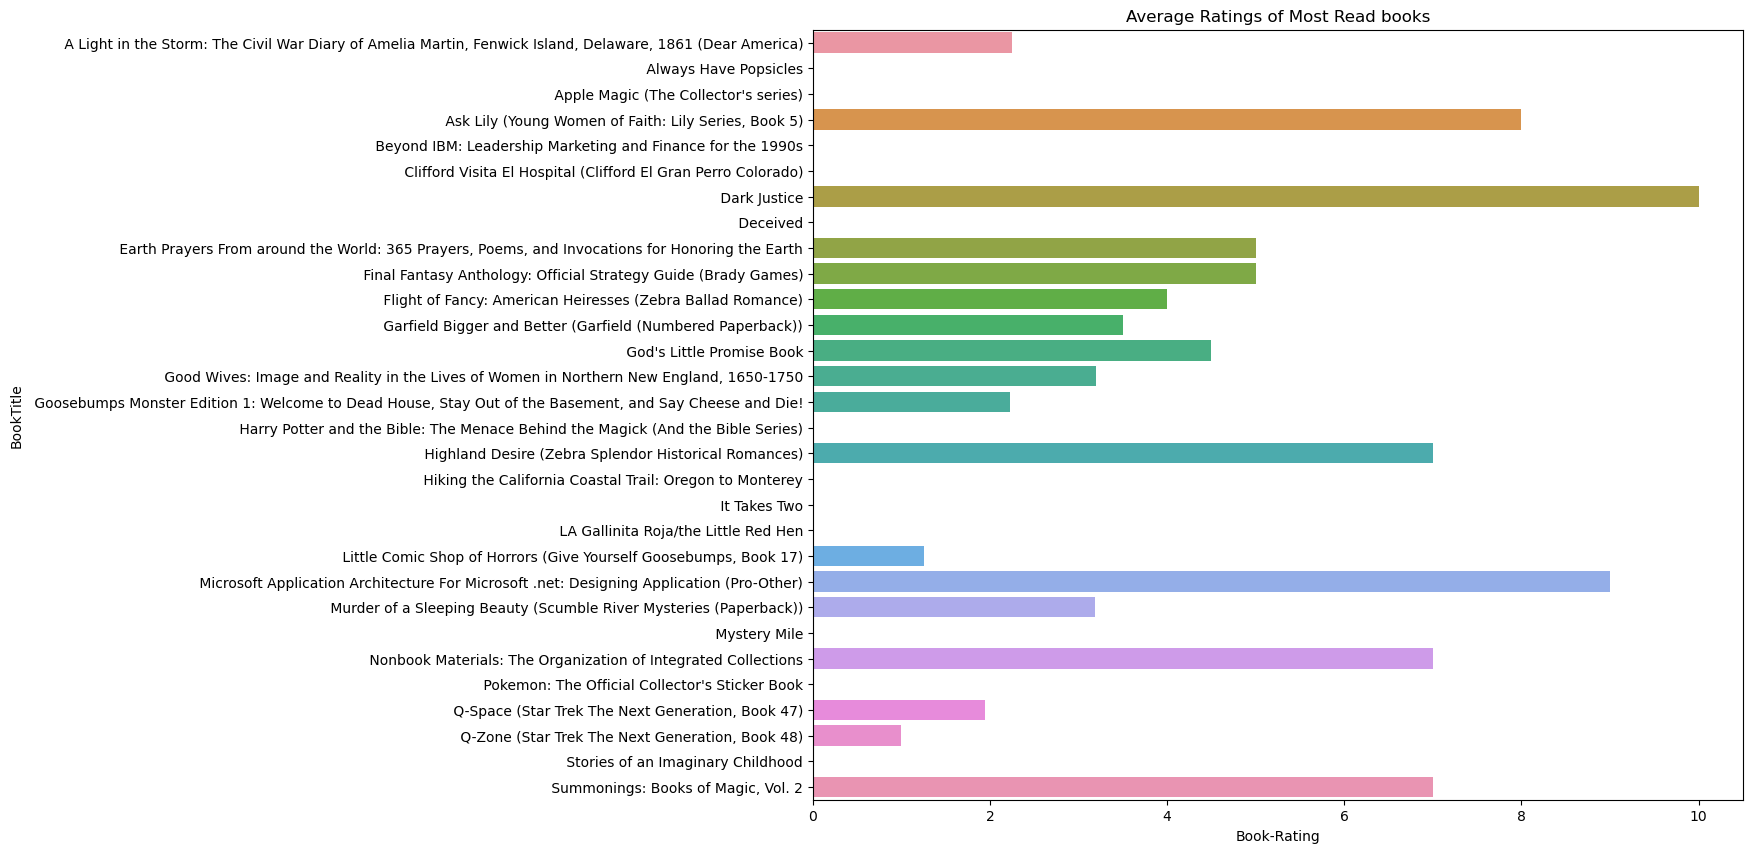

In [135]:
# Create a new figure for the bar chart with a size of 12x10 inches
plt.figure(figsize=(12,10))
#Title
plt.title("Average Ratings of Most Read books")
#Create a bar plot using seaborn
sns.barplot(x = 'Book-Rating', y = 'BookTitle', data = most_rated_by_reads.head(30));

### Visualising top 30 authors with most books

In [136]:
#We count the number of times a book written by an author and plot a barplot for the top 30 authors

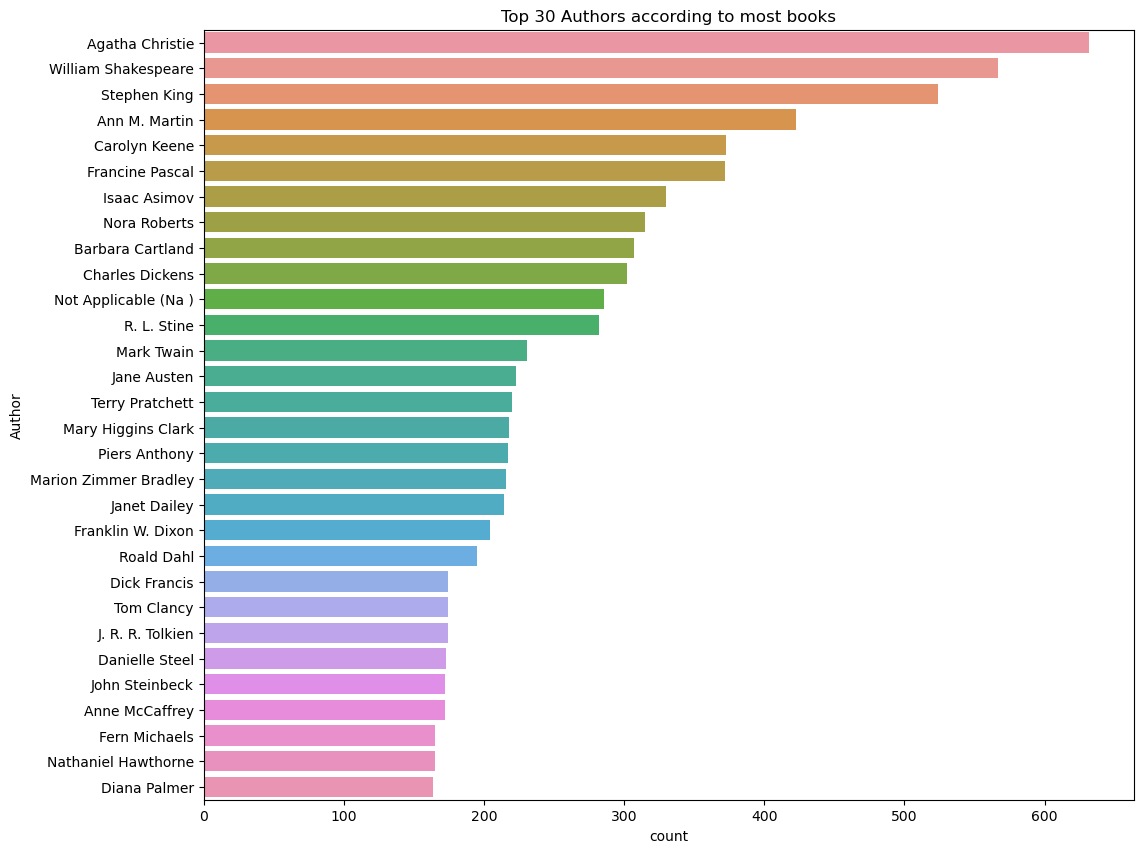

In [137]:
# Count the number of books written by each author in the 'BookAuthor' column of the 'books' DataFrame
top_author = books['BookAuthor'].value_counts().reset_index()
#Renaming the column
top_author.columns = ['Author', 'count']
top_author['Author'] = top_author['Author']
# Sort the DataFrame in descending order based on the 'count' column to find the top authors
top_author = top_author.sort_values('count',ascending=False)
# Create a new figure for the bar chart with a size of 12x10 inches
plt.figure(figsize=(12,10))
plt.title('Top 30 Authors according to most books')
#Create a bar plot using seaborn
sns.barplot(data = top_author.head(30), x = 'count', y = 'Author');

### Visualising top 30 publishers with most books

In [138]:
#We count the number of books published by a publisher and plot top 30 of them

<Axes: title={'center': 'Top 30 Publishers according to most books'}, xlabel='count', ylabel='Publisher'>

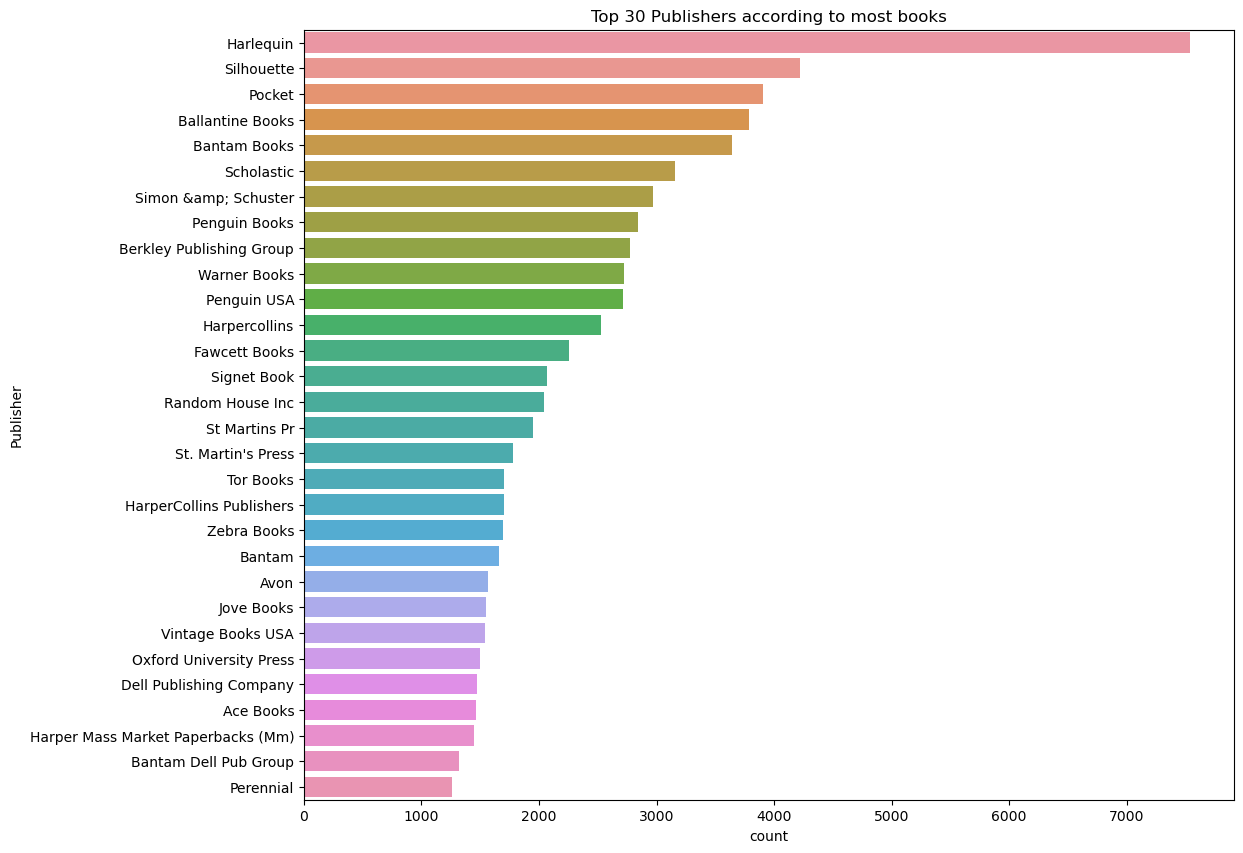

In [139]:
# Calculate the count of books for each publisher and reset the index to make it a DataFrame
top_publisher = books['Publisher'].value_counts().reset_index()

# Rename the columns to 'Publisher' and 'count'
top_publisher.columns = ['Publisher', 'count']

# Sort the DataFrame by the 'count' column in descending order
top_publisher = top_publisher.sort_values('count', ascending=False)

# Create a figure for the plot with a specific size
plt.figure(figsize=(12, 10))

# Set the title for the plot
plt.title('Top 30 Publishers according to most books')

# Create a barplot using seaborn, displaying the top 30 publishers by book count
sns.barplot(data=top_publisher.head(30), x='count', y='Publisher')


### Popularity Based Recommender System

In [140]:
# Merge the 'ratings' dataframe with the 'books' dataframe based on the 'ISBN' column.
# This combines information from both dataframes where 'ISBN' values match
ratings_with_name = ratings.merge(books,on='ISBN')

In [141]:
books.head()

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher,ImageURLS,ImageURLM,ImageURLL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [142]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [143]:
# Group the 'ratings_with_name' dataframe by the 'BookTitle' column and count the number of ratings for each book.
num_rating_df = ratings_with_name.groupby('BookTitle').count()['Book-Rating'].reset_index()
#.reset_index(): This resets the index of the dataframe, so 'BookTitle' becomes a regular column instead of an index
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df

,BookTitle,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241063,Ã?Â?lpiraten.,2
241064,Ã?Â?rger mit Produkt X. Roman.,4
241065,Ã?Â?sterlich leben.,1
241066,Ã?Â?stlich der Berge.,3


In [144]:
#reset_index(): This resets the index of the dataframe, so 'BookTitle' becomes a regular column instead of an index
avg_rating_df = ratings_with_name.groupby('BookTitle').mean()['Book-Rating'].reset_index()
#inplace=True: The inplace=True parameter tells Pandas to apply the column renaming operation directly to the avg_rating_df
#Rather than creating a new DataFrame with the updated column names. 
avg_rating_df.rename(columns={'Book-Rating':'avg_rating'},inplace=True)
avg_rating_df

C:\Users\Kaushik Krishna\AppData\Local\Temp\ipykernel_5260\2471359309.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_rating_df = ratings_with_name.groupby('BookTitle').mean()['Book-Rating'].reset_index()


,BookTitle,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241063,Ã?Â?lpiraten.,0.000000
241064,Ã?Â?rger mit Produkt X. Roman.,5.250000
241065,Ã?Â?sterlich leben.,7.000000
241066,Ã?Â?stlich der Berge.,2.666667


In [145]:
popular_df = num_rating_df.merge(avg_rating_df,on='BookTitle')
popular_df
#merging both avg and num rating to form a popular df on Book Title as its common 

,BookTitle,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241063,Ã?Â?lpiraten.,2,0.000000
241064,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241065,Ã?Â?sterlich leben.,1,7.000000
241066,Ã?Â?stlich der Berge.,3,2.666667


### Sorting the Book titles so it contains num ratings => 250

In [146]:
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_rating',ascending=False).head(50)
#we are considering only the book with num rating => 250 
#It checks for each row whether the value in the 'num_ratings' column is greater than or equal to 250

In [147]:
popular_df = popular_df.merge(books,on='BookTitle').drop_duplicates('BookTitle')[['BookTitle','num_ratings','avg_rating']]

### TOP 50 BOOKS BASED ON POPULARITY

In [148]:
popular_df['BookTitle']
#returns a pandas series for first 9 rows
#[0:9]: This is called slicing.

0      Harry Potter and the Prisoner of Azkaban (Book 3)
3           Harry Potter and the Goblet of Fire (Book 4)
5         Harry Potter and the Sorcerer's Stone (Book 1)
9      Harry Potter and the Order of the Phoenix (Boo...
13      Harry Potter and the Chamber of Secrets (Book 2)
16     The Hobbit : The Enchanting Prelude to The Lor...
17     The Fellowship of the Ring (The Lord of the Ri...
26     Harry Potter and the Sorcerer's Stone (Harry P...
28        The Two Towers (The Lord of the Rings, Part 2)
39                                 To Kill a Mockingbird
47                                     The Da Vinci Code
53                    The Five People You Meet in Heaven
55                                The Catcher in the Rye
62                             The Lovely Bones: A Novel
63                                                  1984
72                              Prodigal Summer: A Novel
73                                            Neverwhere
78                             

## Collaborative Filtering Based Recommender System
Collaborative filtering is a popular technique used in recommender systems to provide personalized recommendations to users.

It works by leveraging the collective preferences and behaviors of a group of users to suggest items.

In [149]:
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
user1 = x[x].index #boolean indexing to fetch the users with more than 200 rating count
#We are selecting the users that have rated 200 or more books ir users1

In [150]:
# Only provide columns with user having min of 200 rating 
# It selects only the rows where the 'User-ID' matches values present in the user1 variable.
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(user1)]

In [151]:
# Filters books that have rating count more than 50
y = filtered_rating.groupby('BookTitle').count()['Book-Rating']>=50
famous_books = y[y].index

In [152]:
final_ratings = filtered_rating[filtered_rating['BookTitle'].isin(famous_books)]
# The result,'final_ratings',will contain only the rows from 'filtered_rating' where the 'BookTitle' is in 'famous_books'.
# It selects only the rows where the 'BookTitle' matches values present in 'famous_books' which have 50 num rating 

In [153]:
pt = final_ratings.pivot_table(index='BookTitle',columns='User-ID',values='Book-Rating')
# This line creates a pivot table from 'final_ratings
#This table contains multiple users with  their ratings for each book

In [154]:
pt.fillna(0,inplace=True) 
#fillna fills all the na values 

In [155]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
BookTitle,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [156]:
from sklearn.metrics.pairwise import cosine_similarity
# The 'cosine_similarity' function calculates the cosine similarity between vectors or data points.

In [157]:
similarity_scores = cosine_similarity(pt)
#Calculate cosine simalarity with all the other rows

In [158]:
similarity_scores.shape
#similarity score of every book with every otther book

(706, 706)

In [159]:
# Define the recommend function that takes a book title as input
def recommend(book_name):
    # Find the index of the book in the pivot table 'pt' based on its title
    index = np.where(pt.index==book_name)[0][0]
     # Calculate the cosine similarity scores between the book at 'index' and all other books
    # Sort the similarity scores in descending order and exclude the first element (the book itself) based on simalarity score
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]
    # Extract information about the recommended book from the 'books' DataFrame
    data = []
    # Add the book title, author, and image URL to the 'item' list
    for i in similar_items:
        item = []
        temp_df = books[books['BookTitle'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('BookTitle')['BookTitle'].values))
        item.extend(list(temp_df.drop_duplicates('BookTitle')['BookAuthor'].values))
        item.extend(list(temp_df.drop_duplicates('BookTitle')['ImageURLS'].values))
        
        data.append(item)
    
    return data

In [160]:
recommend('The Da Vinci Code')

[['Angels &amp; Demons',
  'Dan Brown',
  'http://images.amazon.com/images/P/0671027360.01.THUMBZZZ.jpg'],
 ['Touching Evil',
  'Kay Hooper',
  'http://images.amazon.com/images/P/0553583441.01.THUMBZZZ.jpg'],
 ['Saving Faith',
  'David Baldacci',
  'http://images.amazon.com/images/P/0446608890.01.THUMBZZZ.jpg'],
 ["The Sweet Potato Queens' Book of Love",
  'JILL CONNER BROWNE',
  'http://images.amazon.com/images/P/0609804138.01.THUMBZZZ.jpg']]

In [161]:
recommend('To Kill a Mockingbird')

[['The Catcher in the Rye',
  'J.D. Salinger',
  'http://images.amazon.com/images/P/0316769487.01.THUMBZZZ.jpg'],
 ['Five Quarters of the Orange',
  'Joanne Harris',
  'http://images.amazon.com/images/P/0060958022.01.THUMBZZZ.jpg'],
 ['Drowning Ruth',
  'Christina Schwarz',
  'http://images.amazon.com/images/P/0385502532.01.THUMBZZZ.jpg'],
 ['The Bean Trees',
  'Barbara Kingsolver',
  'http://images.amazon.com/images/P/0060915544.01.THUMBZZZ.jpg']]

In [162]:
recommend('Harry Potter and the Prisoner of Azkaban (Book 3)')

[['Harry Potter and the Goblet of Fire (Book 4)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439139597.01.THUMBZZZ.jpg'],
 ['Harry Potter and the Chamber of Secrets (Book 2)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439064872.01.THUMBZZZ.jpg'],
 ['Harry Potter and the Order of the Phoenix (Book 5)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/043935806X.01.THUMBZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone (Book 1)",
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0590353403.01.THUMBZZZ.jpg']]

## CONCLUSION

The system has provided to 10 books based on popularity 

It also provides list of books that are personalised based on the users previously read books.

A book recommendation system can provide a win-win situation for both users and book platforms.

Users discover new books aligned with their interests, while platforms benefit from increased user engagement and loyalty. 

Continuous improvement, transparency, and a focus on user privacy are key to building a successful recommendation system in the world of literature.